Подключаем библиотеки

In [ ]:
import cupy as cp
import matplotlib.pyplot as plt

from utils.data_loader import load_dataset
from utils.visualisation import plot_samples

Гиперпараметры

In [2]:
LATENT_DIM = 64
EPOCHS = 100
BATCH_SIZE = 1024

cp.random.seed(42)

Загружаем данные

In [3]:
train_X, train_y, test_X, test_y = load_dataset("MNIST", train_percent=0.9, load_percent=1)
train_X = train_X.astype(cp.float32) / 255.0
train_X = train_X.reshape(len(train_X), -1)
train_labels = cp.argmax(train_y, axis=1).astype(cp.int32)
test_X = test_X.astype(cp.float32) / 255.0
test_X = test_X.reshape(len(test_X), -1)
test_labels = cp.argmax(test_y, axis=1).astype(cp.int32)

Тренеруем VAE

In [23]:
vae_plain, loss_vae = train_vae(train_X, train_labels,
                                    test_X, test_labels,
                                    latent_dim=LATENT_DIM, epochs=EPOCHS,
                                    batch_size=BATCH_SIZE, lr=0.1, l2=0.001, 
                                    conditional=False)

VAE epoch 1/100: loss=0.7043
VAE epoch 2/100: loss=0.6940
VAE epoch 3/100: loss=0.6863
VAE epoch 4/100: loss=0.6796
VAE epoch 5/100: loss=0.6734
VAE epoch 6/100: loss=0.6670
VAE epoch 7/100: loss=0.6607
VAE epoch 8/100: loss=0.6543
VAE epoch 9/100: loss=0.6479
VAE epoch 10/100: loss=0.6408
VAE epoch 11/100: loss=0.6338
VAE epoch 12/100: loss=0.6259
VAE epoch 13/100: loss=0.6176
VAE epoch 14/100: loss=0.6087
VAE epoch 15/100: loss=0.5994
VAE epoch 16/100: loss=0.5894
VAE epoch 17/100: loss=0.5795
VAE epoch 18/100: loss=0.5682
VAE epoch 19/100: loss=0.5568
VAE epoch 20/100: loss=0.5452
VAE epoch 21/100: loss=0.5335
VAE epoch 22/100: loss=0.5212
VAE epoch 23/100: loss=0.5089
VAE epoch 24/100: loss=0.4967
VAE epoch 25/100: loss=0.4848
VAE epoch 26/100: loss=0.4736
VAE epoch 27/100: loss=0.4622
VAE epoch 28/100: loss=0.4519
VAE epoch 29/100: loss=0.4416
VAE epoch 30/100: loss=0.4332
VAE epoch 31/100: loss=0.4238
VAE epoch 32/100: loss=0.4164
VAE epoch 33/100: loss=0.4085
VAE epoch 34/100: l

Рисуем результаты VAE

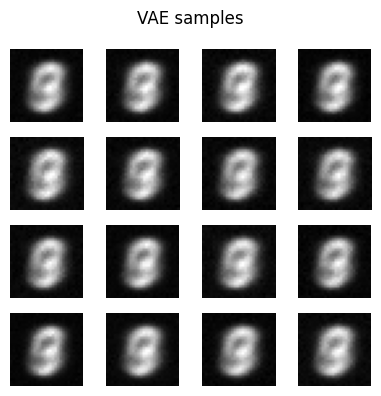

In [24]:
samples_vae = vae_plain.sample(num_samples=16)
plot_samples(samples_vae, "VAE samples")

График потерь VAE

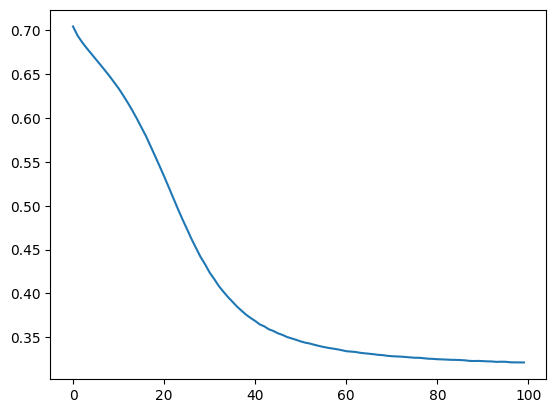

In [25]:
plt.plot(range(len(loss_vae)), [l.get() for l in loss_vae])
plt.show()